# 1707 이분 그래프 ★★★
다른 블로그 참조 : O

reference :

https://hongjw1938.tistory.com/117

### Q)
그래프의 정점의 집합을 둘로 분할하여, 각 집합에 속한 정점끼리는 서로 인접하지 않도록 분할할 수 있을 때, 그러한 그래프를 특별히 이분 그래프 (Bipartite Graph) 라 부른다.

그래프가 입력으로 주어졌을 때, 이 그래프가 이분 그래프인지 아닌지 판별하는 프로그램을 작성하시오.

### Input)
입력은 여러 개의 테스트 케이스로 구성되어 있는데, 첫째 줄에 테스트 케이스의 개수 K가 주어진다. 각 테스트 케이스의 첫째 줄에는 그래프의 정점의 개수 V와 간선의 개수 E가 빈 칸을 사이에 두고 순서대로 주어진다. 각 정점에는 1부터 V까지 차례로 번호가 붙어 있다. 이어서 둘째 줄부터 E개의 줄에 걸쳐 간선에 대한 정보가 주어지는데, 각 줄에 인접한 두 정점의 번호 u, v (u ≠ v)가 빈 칸을 사이에 두고 주어진다. 

### Output)
K개의 줄에 걸쳐 입력으로 주어진 그래프가 이분 그래프이면 YES, 아니면 NO를 순서대로 출력한다.

### Source Code)

In [ ]:
from sys import stdin
from collections import deque
input = stdin.readline

def BFS(start, graph, color):
    queue = deque([])
    queue.append(start)
    color[start] = 1

    while queue:
        cur = queue.popleft()
        for adj in graph[cur]:
            if color[adj] == 0:
                color[adj] = color[cur] * (-1)
                queue.append(adj)
            elif color[adj] == color[cur]:
                return False    

K = int(input())

for _ in range(K):
    V, E = map(int, input().split())
    # 1. 초기화
    graph = [[] for _ in range(V+1)]
    color = [0 for _ in range(V+1)] 

    for _ in range(E):
        a, b = map(int, input().split())
        graph[a].append(b)
        graph[b].append(a)

    # 2. 그래프가 연결/비연결 두 개다 생각해야한다.
    for i in range(V+1):
        if color[i] == 0:
            res = BFS(i, graph, color)
            if res == False:
                break

    if res == False:
        print("NO")
    else:
        print("YES")

이 문제에선 주의해야 할 점이 여러개 있다.

그 전에 이분 그래프를 찾아내는 알고리즘을 먼저 확인해보자.
이분그래프는 다음과 같은 형태의 그래프이다.

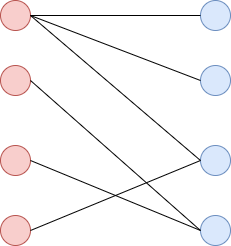

위 그림과 같이 정점을 2 그룹으로 나눌 수 있으되 같은 그룹의 정점끼리는 간선으로 이어지지 않은 경우를 의미한다.
- 학생-수업의 관계 : 학생들이 어떤 수업을 듣고 있는지 관계를 나타내는 맵 그릴 수 있음
- 유저-선호 영화 관계 : 각 유저가 어떠한 영화를 선호하는지 나타내는 맵을 그릴 수 있움
- 구직자-선호 회사 관계 : 각 구직자가 어떤 회사를 선호하는지 나타내는 맵을 그릴 수 있음

#### 구현(DFS or BFS)
1. 최초 탐색 시작할 정점의 색상을 빨간색으로 칠한다.(숫자 1로 표현)
2. 최초 정점의 인접 정점의 색상을 파란색으로 칠한다.(숫자 -1로 표현)
3. 해당 인접 정점들을 차례로 탐색을 시작하며 자신과 인접한 정점을 빨간색으로 칠한다.(숫자 1로 표현)
4. 이와 같은 방식을 탐색을 지속하며 반복하여 2개의 색상으로 모두 칠한다.
5. 색상을 칠하다가 이웃 정점이 같은 색으로 칠해져 있다면 이분 그래프가 될 수 없다.

#### 주의할 점
1. 이 경우 Test Case를 여러 개 주면서 실행하는데 매 번 초기화 할 변수를 잘 확인해야 한다.
2. 문제에서 그래프의 정점들이 모두 연결되어 있는지에 대해선 언급이 없으므로 start를 1로만 잡으면 안된다. 따라서 for문을 돌면서 현재 색깔이 0(색칠 안됨)인 Vertex를 찾아서 해당 Vertex부터 또 다시 진행해 모든 그래프를 확인해주어야 한다.